In [12]:
from ibllib.atlas.regions import BrainRegions
from one.api import ONE
import ibllib.atlas as atlas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
one = ONE()
ba = atlas.AllenAtlas(25)

In [3]:
na = atlas.NeedlesAtlas(25)

In [4]:
traj_plan = one.alyx.rest('trajectories', 'list', provenance='Planned',
                             project='ibl_neuropixel_brainwide_01', use_cache=True)
traj_micro = one.alyx.rest('trajectories', 'list', provenance='Micro-manipulator',
                             project='ibl_neuropixel_brainwide_01', use_cache=True)
traj_ephys = one.alyx.rest('trajectories', 'list', provenance='Ephys aligned histology track',
                           project='ibl_neuropixel_brainwide_01', use_cache=True)

In [19]:
traj_plan = one.alyx.rest('trajectories', 'list', provenance='Planned',
                             project='ibl_neuropixel_brainwide_01', use_cache=True)
traj_plan[0]

{'id': '9e7f2453-13a0-4ae5-bd51-c3fc7cfd25d0',
 'probe_insertion': '071f02e7-752a-4094-af79-8dd764e9d85d',
 'x': -1768.0,
 'y': -1500.0,
 'z': -122.0,
 'depth': 4000.0,
 'theta': 15.0,
 'phi': 180.0,
 'roll': None,
 'provenance': 'Planned',
 'session': {'subject': 'ZM_1897',
  'start_time': '2019-12-06T10:07:39',
  'number': 1,
  'lab': 'mainenlab',
  'id': 'e5fae088-ed96-4d9b-82f9-dfd13c259d52',
  'task_protocol': '_iblrig_tasks_ephysChoiceWorld6.2.3'},
 'probe_name': 'probe00',
 'coordinate_system': 'Needles-Allen',
 'datetime': '2020-06-09T07:59:14.315700',
 'json': None}

In [5]:
for ctraj_p in traj_plan:
    if ctraj_p['x']>10000 or ctraj_p['x']<-10000:
        print([ctraj_p['x'],ctraj_p['y'],ctraj_m['z']])
        print(ctraj_p['probe_insertion'])
    if ctraj_p['y']>10000 or ctraj_p['y']<-10000:
        print([ctraj_p['x'],ctraj_p['y'],ctraj_m['z']])
        print(ctraj_p['probe_insertion'])
    if ctraj_p['z']>10000 or ctraj_p['z']<-10000:
        print([ctraj_p['x'],ctraj_p['y'],ctraj_m['z']])
        print(ctraj_p['probe_insertion'])

In [6]:
for ctraj_m in traj_micro:
    if ctraj_m['x']>10000 or ctraj_m['x']<-10000:
        print([ctraj_m['x'],ctraj_m['y'],ctraj_m['z']])
        print(ctraj_m['probe_insertion'])
    if ctraj_m['y']>10000 or ctraj_m['y']<-10000:
        print([ctraj_m['x'],ctraj_m['y'],ctraj_m['z']])
        print(ctraj_m['probe_insertion'])
    if ctraj_m['z']>10000 or ctraj_m['z']<-10000:
        print([ctraj_m['x'],ctraj_m['y'],ctraj_m['z']])
        print(ctraj_m['probe_insertion'])

[-1859.4, -60052.4, -1730.0]
759860bc-732d-4b9e-aeb4-154ef37c056b
[17630.0, -3700.1, -715.0]
db22891d-02cc-4318-9594-53e042d40396


In [7]:
skip = ['759860bc-732d-4b9e-aeb4-154ef37c056b','db22891d-02cc-4318-9594-53e042d40396']

In [63]:
# Write data to a pandas dataframe
n = len(traj_ephys) - len(skip) -1
data = np.ndarray((n,10))
pids = []

count = 0
for i,ctraj_e in enumerate(traj_ephys):
    pid = ctraj_e['probe_insertion']
    
    if pid in skip:
        continue
        
    
    found = False
    # find the matching trajectory in traj_micro
    for traj in traj_micro:
        if traj['probe_insertion']==pid:
            ctraj_m = traj
            found = True
            continue
            
    if not found:
        continue
        
    for traj in traj_plan:
        if traj['probe_insertion']==pid:
            ctraj_p = traj
            continue
       
    pids.append(pid)
    data[count,:] = [i, ctraj_p['x'], ctraj_p['y'], ctraj_p['z'], ctraj_m['x'], ctraj_m['y'], ctraj_m['z'], ctraj_e['x'], ctraj_e['y'], ctraj_e['z']]
    count+=1
    
df = pd.DataFrame(data,
                  columns=['pid','px','py','pz','mx','my','mz','ex','ey','ez'])
df['pid'] = pids

In [64]:
df.to_csv('./trajectory_data.csv')

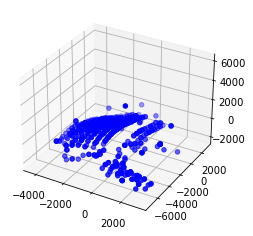

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['px'],df['py'],df['pz'],color='

In [136]:
ccf_m += bregma

In [137]:
ccf_m

array([ 1615.4   ,   549.8074, -1345.1008])

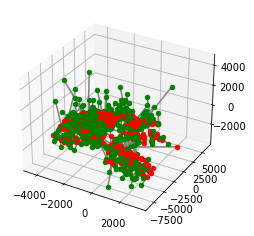

In [150]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
bregma = ba.xyz2ccf([0,0,0])

for i, (pid, ccf) in enumerate(data.items()):
    ccf_e = ccf[0]
    ccf_m = ccf[1]
    
    ccf_m_0 = ccf_m + bregma 

    # if (ccf_m_0[0]<0 or ccf_m_0[0]>11400) or (ccf_m_0[1]<0 or ccf_m_0[1]>13200) or (ccf_m_0[2]<0 or ccf_m_0[2]>8000):
    #     print(pid + ' outside mlapdv space')
    #     print(ccf_m)
    
    ax.scatter(ccf_e[0],ccf_e[1],ccf_e[2],color='r') # ephys aligned
    ax.scatter(ccf_m[0],ccf_m[1],ccf_m[2],color='g') # micro manipulator planned
    ax.plot3D([ccf_e[0],ccf_m[0]], [ccf_e[1],ccf_m[1]], [ccf_e[2],ccf_m[2]], 'gray')

In [69]:
ccf_m

array([2640.91870241, 9107.26770929, 6220.32762763])